Demo STAC

In [40]:
import json
from pystac import Catalog, get_stac_version

Load the catalog

In [41]:
root_catalog = Catalog.from_file('catalog.json')

Describe the catalog


In [42]:
root_catalog.describe()

* <Catalog id=utrecht-stac-collection-catalog>
    * <Collection id=Utrecht>
      * <Item id=utrecht_trees>


Get the collections


In [43]:
collections = list(root_catalog.get_collections())

print(f"Number of collections: {len(collections)}")
print("Collections IDs:")
for collection in collections:
    print(f"- {collection.id}")

Number of collections: 1
Collections IDs:
- Utrecht


Get the first collection

In [44]:
collection = root_catalog.get_child("Utrecht")
if collection is None:
    print("Collection is Empty. Check your downloads and try agian.")
else:
    print("Collection has a root child. You may proceed to the following steps.")

Collection has a root child. You may proceed to the following steps.


Get the Items

In [45]:
items = list(root_catalog.get_all_items())

print(f"Number of items: {len(items)}")
for item in items:
    print(f"- {item.id}")

Number of items: 1
- utrecht_trees


Get the first item (trees)

In [46]:
item = root_catalog.get_item("utrecht_trees", recursive=True)

In [47]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[5.051823, 52.055974],
   [5.215158, 52.055974],
   [5.215158, 52.112567],
   [5.051823, 52.112567],
   [5.051823, 52.055974]]]}

Get the assets of the trees

In [19]:
item.get_assets()

{'1606_bomen.geojson': <Asset href= https://bertt.github.io/opendata/netherlands/utrecht/bomen/1606/1606_bomen.geojson>,
 '1609_bomen.geojson': <Asset href=  https://bertt.github.io/opendata/netherlands/utrecht/bomen/1609/bomen_1609.geojson>,
 '1612_bomen.geojson': <Asset href=  https://bertt.github.io/opendata/netherlands/utrecht/bomen/1612/bomen_1612.geojson>}

In [20]:
for asset_key in item.assets:
    asset = item.assets[asset_key]
    print('{}: {} ({})'.format(asset_key, asset.href, asset.media_type))

1606_bomen.geojson:  https://bertt.github.io/opendata/netherlands/utrecht/bomen/1606/1606_bomen.geojson (application/geojson)
1609_bomen.geojson:   https://bertt.github.io/opendata/netherlands/utrecht/bomen/1609/bomen_1609.geojson (application/geojson)
1612_bomen.geojson:   https://bertt.github.io/opendata/netherlands/utrecht/bomen/1612/bomen_1612.geojson (application/geojson)


Get the first asset

In [21]:
asset = item.assets['1606_bomen.geojson']
asset.to_dict()

{'href': ' https://bertt.github.io/opendata/netherlands/utrecht/bomen/1606/1606_bomen.geojson',
 'type': 'application/geojson',
 'created': '2016-06-01T07:10:11.509271Z',
 'updated': '2016-06-01T06:19:31.383374Z',
 'proj:epsg': 4326}

In [22]:
import requests

Get the number of trees in the dataset


In [23]:
response = requests.get(asset.href)
data = response.json()

print(f"Aantal features in {asset.href}: {len(data['features'])}")

Aantal features in  https://bertt.github.io/opendata/netherlands/utrecht/bomen/1606/1606_bomen.geojson: 159608


Plot the trees

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [35]:
gdf = gpd.GeoDataFrame.from_features(data["features"])

<Axes: >

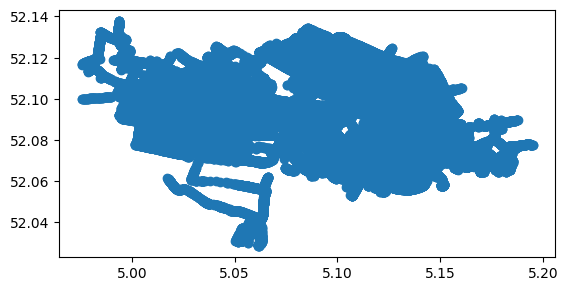

In [39]:
gdf.plot()